In [164]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline


In [125]:
data=fetch_openml(name="PhishingWebsites",as_frame=True,version=1)

In [126]:
data

{'data':       having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
 0                    -1          1                  1                1   
 1                     1          1                  1                1   
 2                     1          0                  1                1   
 3                     1          0                  1                1   
 4                     1          0                 -1                1   
 ...                 ...        ...                ...              ...   
 11050                 1         -1                  1               -1   
 11051                -1          1                  1               -1   
 11052                 1         -1                  1                1   
 11053                -1         -1                  1                1   
 11054                -1         -1                  1                1   
 
       double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
 0      

In [127]:
type(data)

sklearn.utils._bunch.Bunch

In [128]:

df = pd.DataFrame(data.data,columns=data.feature_names)


In [129]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [130]:
df["Phishing Websites"]=pd.DataFrame(data=data.target)

In [131]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Phishing Websites
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [132]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Phishing Websites
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   having_IP_Address            11055 non-null  category
 1   URL_Length                   11055 non-null  category
 2   Shortining_Service           11055 non-null  category
 3   having_At_Symbol             11055 non-null  category
 4   double_slash_redirecting     11055 non-null  category
 5   Prefix_Suffix                11055 non-null  category
 6   having_Sub_Domain            11055 non-null  category
 7   SSLfinal_State               11055 non-null  category
 8   Domain_registeration_length  11055 non-null  category
 9   Favicon                      11055 non-null  category
 10  port                         11055 non-null  category
 11  HTTPS_token                  11055 non-null  category
 12  Request_URL                  11055 non-null  category
 13  U

In [134]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Phishing W

In [135]:
encoder =LabelEncoder()
for i in df.columns:
    df[i] =encoder.fit_transform(df[i])


In [137]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Phishing Websites
0,0,2,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,2,0,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,0,0,1,0,1,2,1,0
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,2,0,1,1,0,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,0,0,2,0,1,0,1,0
4,1,1,0,1,1,0,2,2,0,1,...,0,1,0,0,1,0,1,2,1,1


In [138]:
df.dtypes

having_IP_Address              int32
URL_Length                     int32
Shortining_Service             int32
having_At_Symbol               int32
double_slash_redirecting       int32
Prefix_Suffix                  int32
having_Sub_Domain              int32
SSLfinal_State                 int32
Domain_registeration_length    int32
Favicon                        int32
port                           int32
HTTPS_token                    int32
Request_URL                    int32
URL_of_Anchor                  int32
Links_in_tags                  int32
SFH                            int32
Submitting_to_email            int32
Abnormal_URL                   int32
Redirect                       int32
on_mouseover                   int32
RightClick                     int32
popUpWidnow                    int32
Iframe                         int32
age_of_domain                  int32
DNSRecord                      int32
web_traffic                    int32
Page_Rank                      int32
G

In [139]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Phishing Websites
0,0,2,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,2,0,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,0,0,1,0,1,2,1,0
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,2,0,1,1,0,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,0,0,2,0,1,0,1,0
4,1,1,0,1,1,0,2,2,0,1,...,0,1,0,0,1,0,1,2,1,1


In [140]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Phishing Websites'],
      dtype='object')

In [141]:
type(df.columns)

pandas.core.indexes.base.Index

In [142]:
name_list=[]
value_list=[]
for i in df.columns:
    name_list.append(i)
    value_list.append(df[i].value_counts())


In [143]:
name_list

['having_IP_Address',
 'URL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Phishing Websites']

In [144]:
value_list

[having_IP_Address
 1    7262
 0    3793
 Name: count, dtype: int64,
 URL_Length
 0    8960
 2    1960
 1     135
 Name: count, dtype: int64,
 Shortining_Service
 1    9611
 0    1444
 Name: count, dtype: int64,
 having_At_Symbol
 1    9400
 0    1655
 Name: count, dtype: int64,
 double_slash_redirecting
 1    9626
 0    1429
 Name: count, dtype: int64,
 Prefix_Suffix
 0    9590
 1    1465
 Name: count, dtype: int64,
 having_Sub_Domain
 2    4070
 1    3622
 0    3363
 Name: count, dtype: int64,
 SSLfinal_State
 2    6331
 0    3557
 1    1167
 Name: count, dtype: int64,
 Domain_registeration_length
 0    7389
 1    3666
 Name: count, dtype: int64,
 Favicon
 1    9002
 0    2053
 Name: count, dtype: int64,
 port
 1    9553
 0    1502
 Name: count, dtype: int64,
 HTTPS_token
 1    9259
 0    1796
 Name: count, dtype: int64,
 Request_URL
 1    6560
 0    4495
 Name: count, dtype: int64,
 URL_of_Anchor
 1    5337
 0    3282
 2    2436
 Name: count, dtype: int64,
 Links_in_tags
 1    4449


C:\Users\arifu\AppData\Local\Temp\ipykernel_23312\1624512475.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


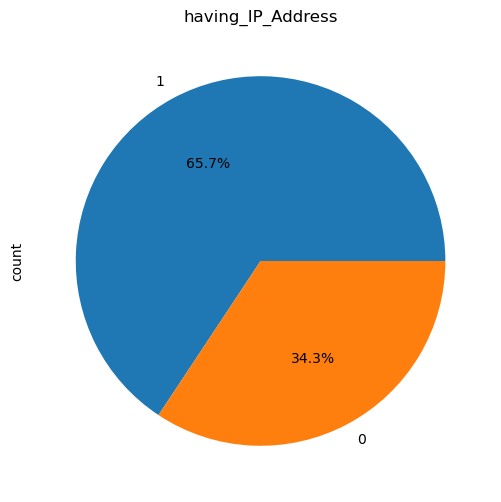

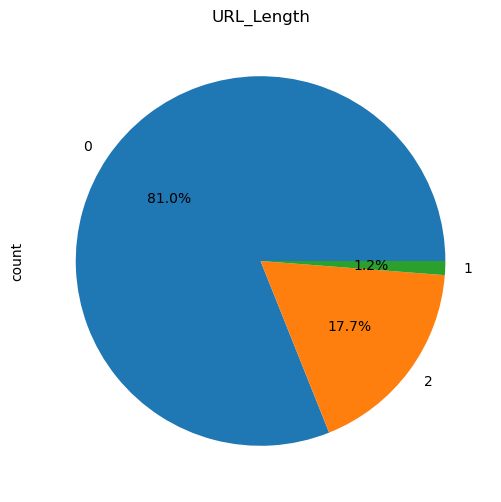

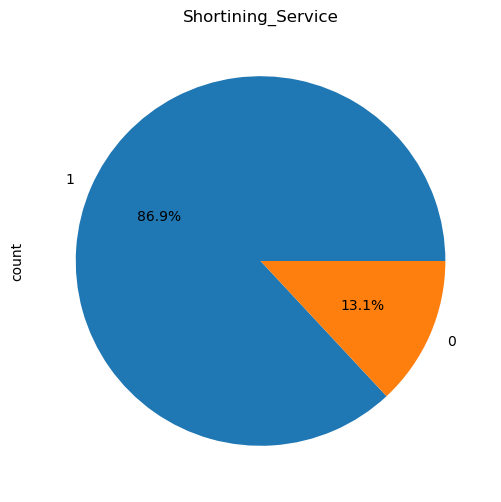

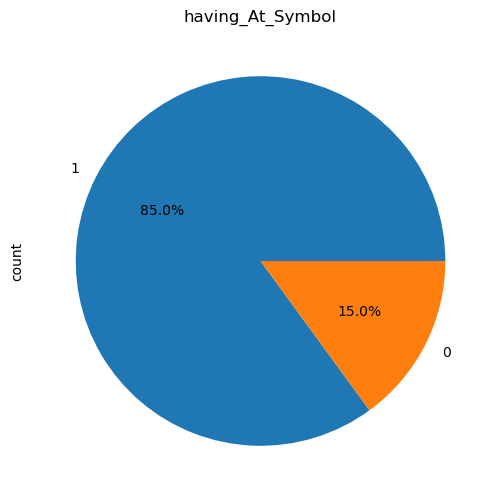

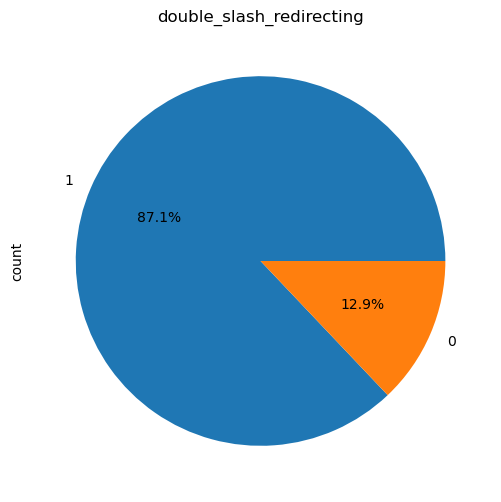

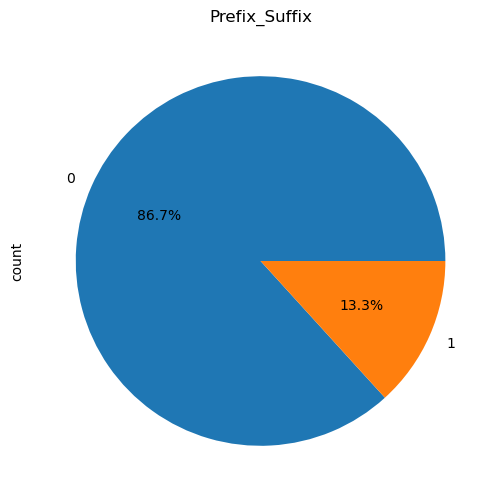

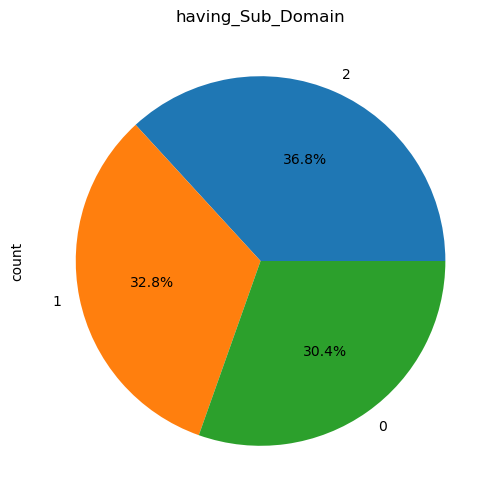

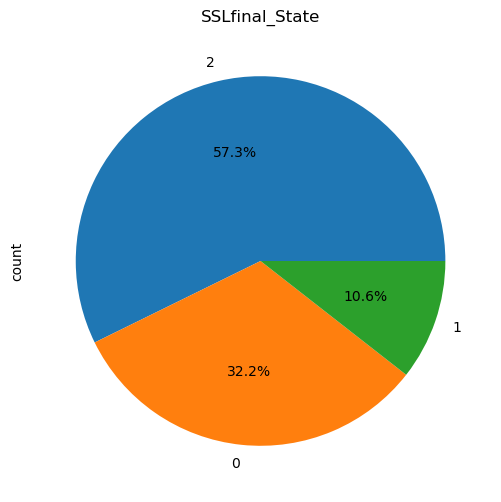

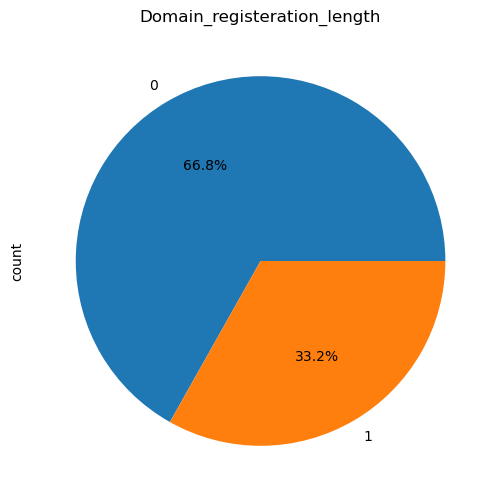

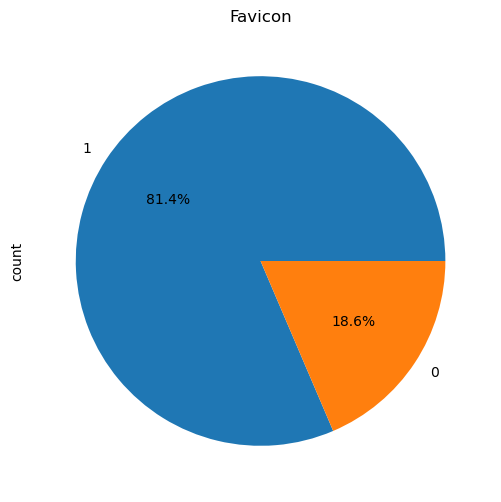

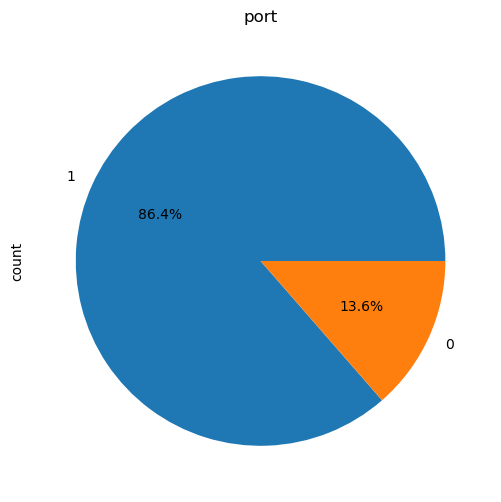

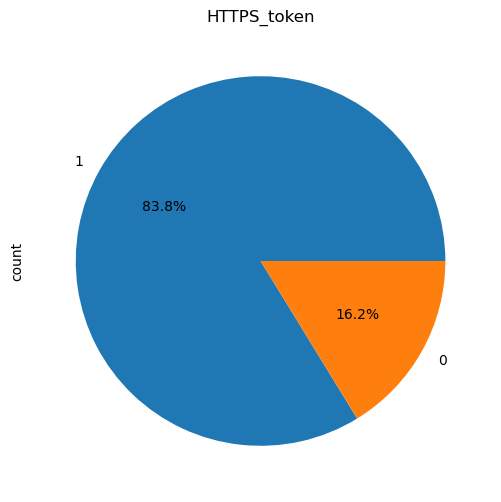

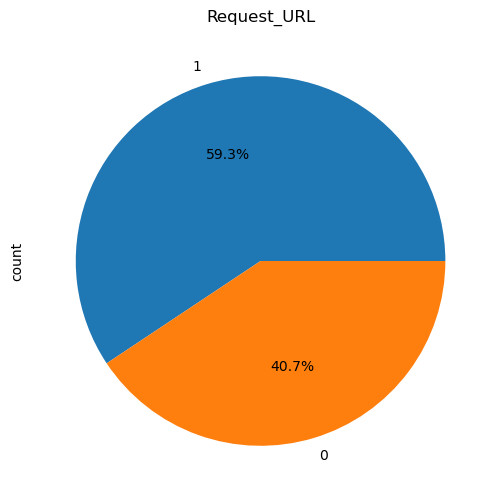

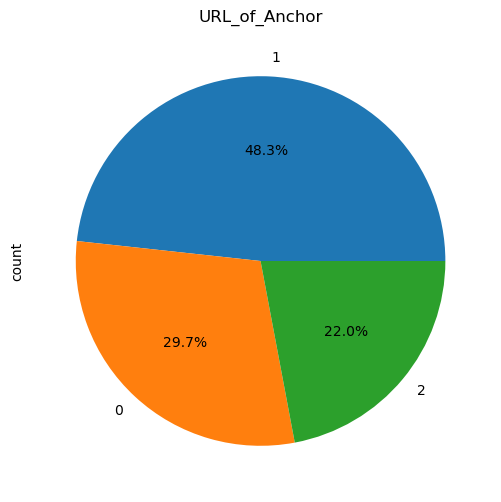

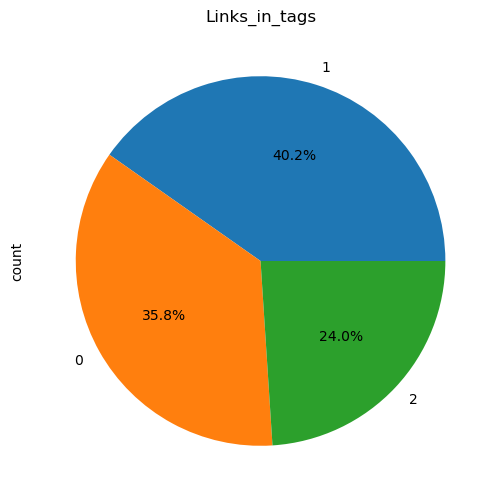

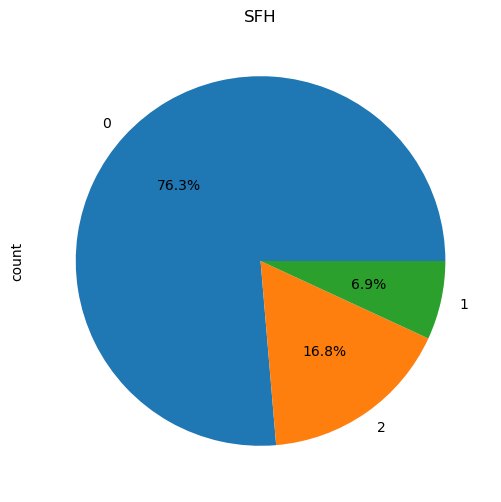

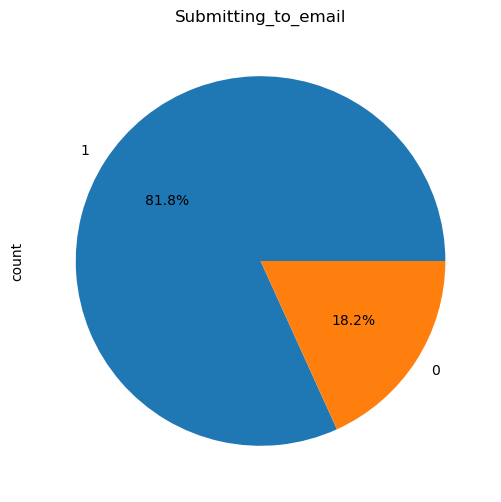

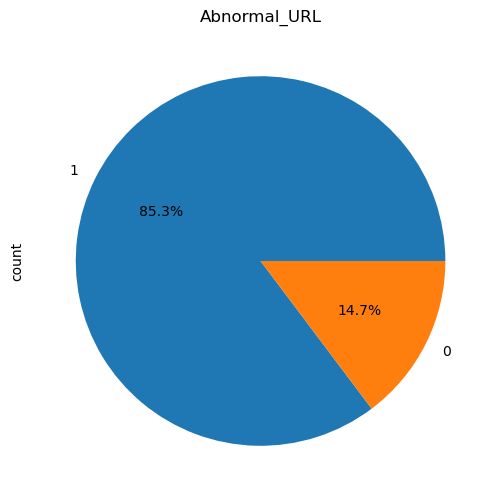

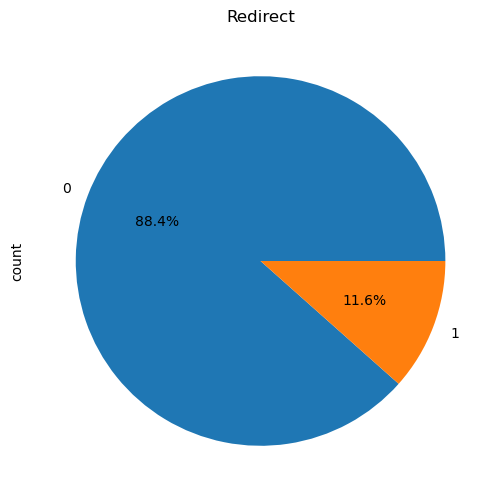

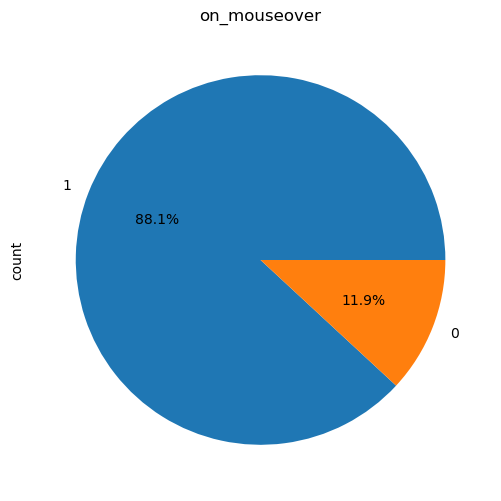

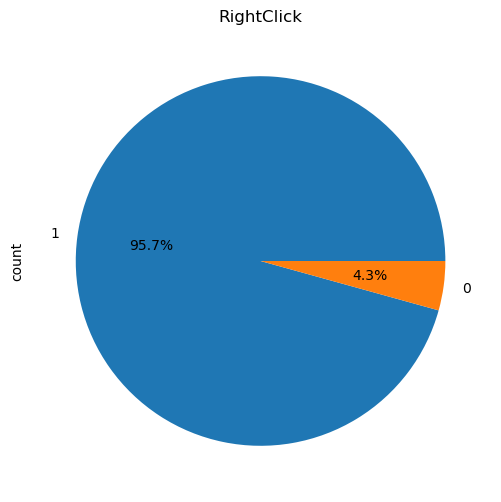

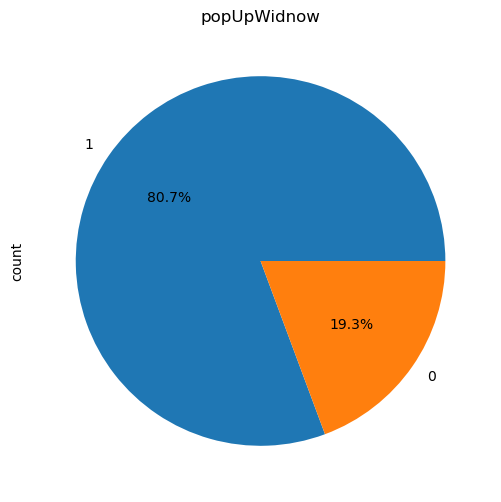

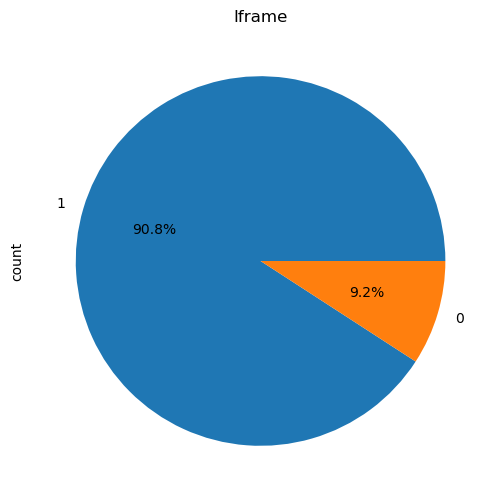

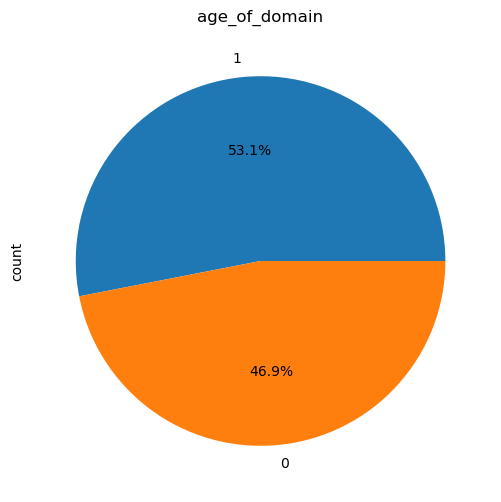

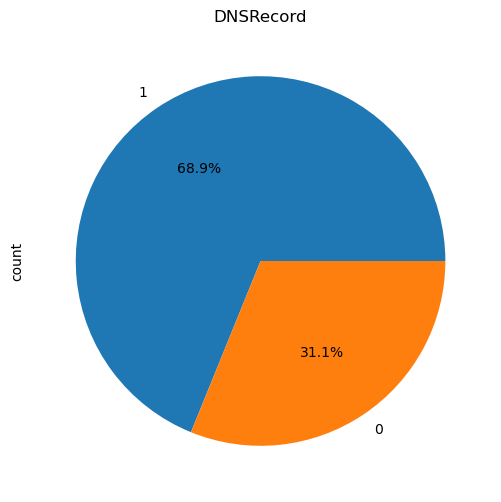

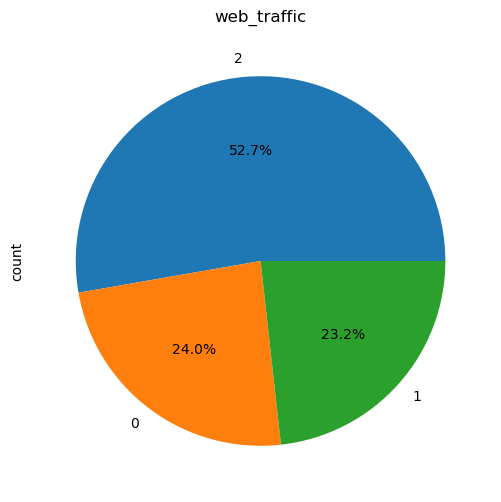

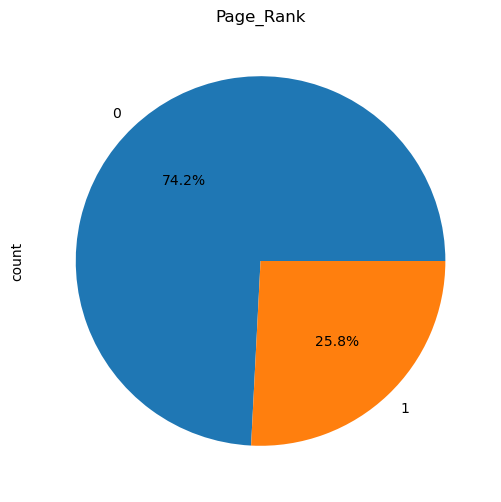

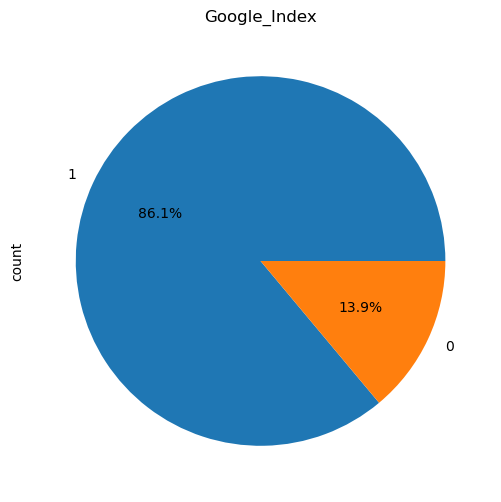

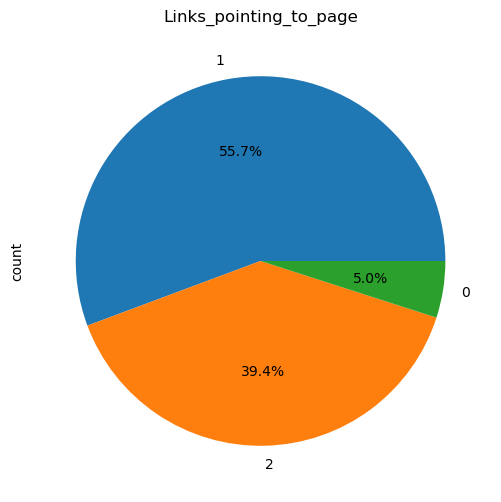

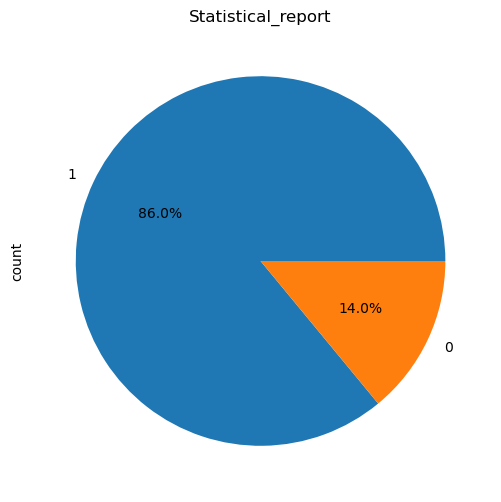

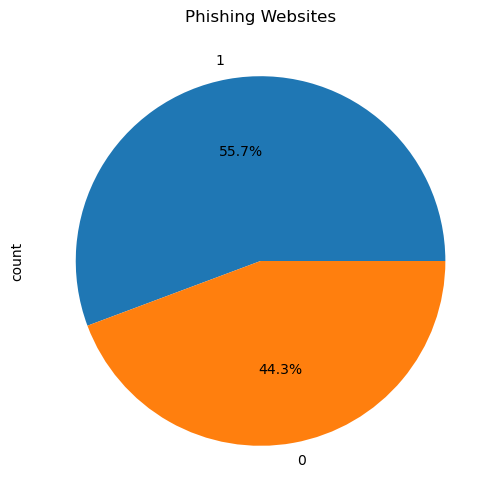

In [145]:
for i in df.columns:
    plt.figure(figsize=(8, 6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(i)

#data in majority columns off balance,suitable for ensemble


In [55]:
# for i in df.columns:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x=i, data=df)
#optional

In [146]:
len(df.columns)

31

In [152]:
x=df.drop(columns=["Phishing Websites"])

In [153]:
x

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0,2,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,2,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,1,0,0,1,0,1,2,1
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,0,2,0,1,1,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,1,0,0,2,0,1,0,1
4,1,1,0,1,1,0,2,2,0,1,...,1,0,1,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,0,1,0,1,1,2,2,0,0,...,0,0,0,1,1,0,0,1,2,1
11051,0,2,1,0,0,0,2,0,0,0,...,1,0,1,1,1,2,1,1,0,1
11052,1,0,1,1,1,0,2,0,0,1,...,1,1,1,1,1,2,0,1,1,1
11053,0,0,1,1,1,0,0,0,1,0,...,1,0,1,1,1,2,0,1,2,1


In [154]:
y=df["Phishing Websites"]

In [156]:
y

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Phishing Websites, Length: 11055, dtype: int32

In [157]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#!pip install xgboost 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier 
   

lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
svc = SVC(probability=True)

In [ ]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svc.fit(X_train, y_train)


C:\Users\arifu\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:17:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVC(probability=True)

In [161]:
from sklearn.metrics import accuracy_score
models=[lr,rf,xgb,svc]
for model in models:
    pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    print(f"accuracy:{accuracy}")

accuracy:0.924468566259611
accuracy:0.9678878335594754
accuracy:0.9706015377657169
accuracy:0.9525101763907734


In [163]:

voting = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('svc', svc)], voting='soft')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_pred):.4f}")

C:\Users\arifu\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:20:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier Accuracy: 0.9643


In [165]:
stacking = StackingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier())
], final_estimator=GaussianNB())

stacking.fit(X_train, y_train)
stack_pred = stacking.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, stack_pred):.4f}")

Stacking Classifier Accuracy: 0.9724
